In [1]:
import re
import pandas as pd
import numpy as np
import networkx as nx
import time

### Funciones para Dijkstra

In [2]:
Tiempo_inicio = time.time()
def minDistance(dist, fin, v):
 
        # distancia minima inicia en inf
        min_d = np.inf
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(v):
            if dist[u] < min_d and fin[u] == False:
                min_d = dist[u] 
                min_index = u
 
        return min_index

def dijktrs(nodo_i):
    
    dist = [np.inf]*v # inicializar todas las distancias en inf
    dist[nodo_i] = 0 # cambiar la distancia del nodo 1 al 1 a 0
    fin = [False]*v # variable que controla si un nodo ha sido finalizado

    for _ in range(v):

        # indice de el nodo no finalizado con la distancia minima al nodo de inicio
        x = minDistance(dist, fin, v)  # siempre la primera vez va a ser el nodo inicial    

        # agregar nodo a conjunto de nodos finalizados
        fin[x] = True

        # actualizar la distancia a los nodos adyacentes al nodo actual
        for y in range(v):
            if grafo[x][y] > 0 and fin[y] == False and dist[y] > dist[x] + grafo[x][y]:
                dist[y] = dist[x] + grafo[x][y]
                
    return dist
Tiempo_fin =time.time()-Tiempo_inicio 

In [3]:
print(f"Tiempo de cómputo del algoritmo de vecino más cercado es {round(Tiempo_fin,5)} segundos")

Tiempo de cómputo del algoritmo de vecino más cercado es 0.00016 segundos


### Leyendo archivo

In [4]:
archivo = open("Instancias/gdb2.dat",'r') #Leer el archivo de instancias
datos = [] #inicializar una lista de los datos que tiene el archivo divididos por lineas
for linea in archivo:
    datos.append(linea.rstrip("\n"))
archivo.close()
#Capacidad de los vehiculos
Cap = [int(n) for n in re.findall(r'-?\d+\.?\d*',datos[6])]
#nodo donde se encuentra el deposito
dep = [int(n) for n in re.findall(r'-?\d+\.?\d*',datos[-1])]
arcos = [] #obtener los datos de los arcos, (nodo inicial, nodo final, costo del arco, demanda del arco)

for i in range(10,len(datos)-1):
    s = [int(s) for s in re.findall(r'-?\d+\.?\d*',datos[i])]
    arcos.append(s)

arcos = np.array(arcos)

In [5]:
arcos

array([[ 1,  2, 13,  1],
       [ 1,  4, 17,  1],
       [ 1,  7, 19,  1],
       [ 1,  9, 11,  1],
       [ 1, 10, 19,  1],
       [ 1, 12,  4,  1],
       [ 2,  3, 18,  1],
       [ 2,  4,  9,  1],
       [ 2,  9,  2,  1],
       [ 3,  4, 20,  1],
       [ 3,  5,  5,  1],
       [ 4, 12,  5,  1],
       [ 5,  6,  7,  1],
       [ 5, 11, 20,  1],
       [ 5, 12, 11,  1],
       [ 6,  7,  4,  1],
       [ 6,  8, 14,  1],
       [ 6, 12,  3,  1],
       [ 7,  8,  8,  1],
       [ 7, 10,  9,  1],
       [ 7, 12, 18,  1],
       [ 8, 10,  3,  1],
       [ 8, 11, 10,  1],
       [ 9, 10, 16,  1],
       [ 9, 11, 14,  1],
       [10, 11, 12,  1]])

In [6]:
nodos = np.unique(arcos[:,0:2].ravel())

## Crear representacion de matriz del grafo

In [7]:
# numero de vertices
v = len(nodos)
# crear representacion de matriz del grafo
grafo = np.zeros((v, v))
for a in arcos:
    grafo[a[0]-1,a[1]-1] = a[2]
grafo += grafo.T
grafo

array([[ 0., 13.,  0., 17.,  0.,  0., 19.,  0., 11., 19.,  0.,  4.],
       [13.,  0., 18.,  9.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
       [ 0., 18.,  0., 20.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [17.,  9., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.],
       [ 0.,  0.,  5.,  0.,  0.,  7.,  0.,  0.,  0.,  0., 20., 11.],
       [ 0.,  0.,  0.,  0.,  7.,  0.,  4., 14.,  0.,  0.,  0.,  3.],
       [19.,  0.,  0.,  0.,  0.,  4.,  0.,  8.,  0.,  9.,  0., 18.],
       [ 0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  3., 10.,  0.],
       [11.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  0.],
       [19.,  0.,  0.,  0.,  0.,  0.,  9.,  3., 16.,  0., 12.,  0.],
       [ 0.,  0.,  0.,  0., 20.,  0.,  0., 10., 14., 12.,  0.,  0.],
       [ 4.,  0.,  0.,  5., 11.,  3., 18.,  0.,  0.,  0.,  0.,  0.]])

### Crear matrix de Dijkstra

In [8]:
dij_mat = []
for i in range(v):
    dij_mat.append(dijktrs(i))
dij_mat = np.array(dij_mat)
dij_mat

array([[ 0., 13., 19.,  9., 14.,  7., 11., 19., 11., 19., 25.,  4.],
       [13.,  0., 18.,  9., 23., 17., 21., 21.,  2., 18., 16., 14.],
       [19., 18.,  0., 20.,  5., 12., 16., 24., 20., 25., 25., 15.],
       [ 9.,  9., 20.,  0., 15.,  8., 12., 20., 11., 21., 25.,  5.],
       [14., 23.,  5., 15.,  0.,  7., 11., 19., 25., 20., 20., 10.],
       [ 7., 17., 12.,  8.,  7.,  0.,  4., 12., 18., 13., 22.,  3.],
       [11., 21., 16., 12., 11.,  4.,  0.,  8., 22.,  9., 18.,  7.],
       [19., 21., 24., 20., 19., 12.,  8.,  0., 19.,  3., 10., 15.],
       [11.,  2., 20., 11., 25., 18., 22., 19.,  0., 16., 14., 15.],
       [19., 18., 25., 21., 20., 13.,  9.,  3., 16.,  0., 12., 16.],
       [25., 16., 25., 25., 20., 22., 18., 10., 14., 12.,  0., 25.],
       [ 4., 14., 15.,  5., 10.,  3.,  7., 15., 15., 16., 25.,  0.]])

### Algoritmo para visitar todos los arcos usando el vecino mas cercano y dijkstra

In [9]:
Tiempo_inicio = time.time()
gr = grafo.copy()
dj = dij_mat.copy()
current_node = dep[0] - 1
visited = [current_node]
cost = 0
rec = 0
pick = []

while not np.all(gr == 0):
    
    
    if rec == 5:
        
        next_node = 0
        pick.append(0)
        cost += dij_mat[current_node][0]
        rec = -1
        
    else:
        
        non_z = np.nonzero(gr[current_node])[0] # non zero values in row given by current_node
        if len(non_z) == 0: # use disjktra
            
            pick.append(0)
            dij_non_z = np.nonzero(dj[current_node])[0]
            if len(dij_non_z) == 0:
                next_node = np.where(gr != 0)[0][0]
                cost += dij_mat[current_node][next_node]
                
            else:
                next_node = dij_non_z[np.argmin(dj[current_node][dij_non_z])] # not adjacent node with less cost from current node
                cost += dj[current_node][next_node] 

        else:        
            pick.append(1)
            next_node = non_z[np.argmin(gr[current_node][non_z])] # adjacent node with less cost from current node
            cost += gr[current_node][next_node] 
    
        gr[current_node][next_node] = 0    
        gr[next_node][current_node] = 0
        dj[current_node][next_node] = 0 
        dj[next_node][current_node] = 0
    
    current_node = next_node    
    visited.append(current_node)
    rec += 1

# para llegar al deposito al final de todo
visited.append(0)
pick.append(0)
cost += dij_mat[current_node][visited[-1]]
cost
Tiempo_fin =time.time()-Tiempo_inicio 

In [10]:
print(f"Tiempo de cómputo del algoritmo de vecino más cercado es {round(Tiempo_fin,5)} segundos")

Tiempo de cómputo del algoritmo de vecino más cercado es 0.00117 segundos


In [11]:
np.array(visited) + 1

array([ 1, 12,  6,  7,  8, 10,  1,  9,  2,  4, 12,  5,  1,  2,  3,  5,  6,
        8,  1,  4,  3,  6,  1,  7,  1, 10,  7, 12,  2, 11,  1,  5, 11,  8,
       12,  3,  1,  3,  7,  5,  4,  6,  1,  8,  5, 10, 11,  9,  1, 11,  7,
        4,  9, 10,  1])

In [12]:
np.array(pick)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

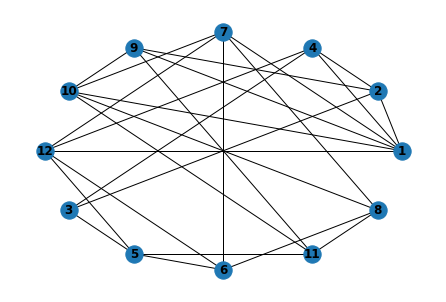

In [13]:
#Creación del grafo
df=pd.DataFrame(arcos,columns=["i","j","costo","d"])
grafo= nx.Graph()
for i in df.iterrows():
    grafo.add_edge(i[1]["i"],i[1]["j"],costo=i[1]["costo"])


nx.draw_circular(grafo, with_labels=True, font_weight='bold')

